# Taiwan City Population

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [13]:
df = pd.read_excel("taiwan.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        159 non-null    object 
 1   lat         159 non-null    float64
 2   lng         159 non-null    float64
 3   population  159 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.1+ KB


In [14]:
df.head()

,city,lat,lng,population
0,Taichung,24.1439,120.6794,3033885
1,Kaohsiung,22.6150,120.2975,2733964
2,Taipei,25.0375,121.5625,2603150
3,Tainan,22.9833,120.1833,1874686
4,Zhongli,24.9650,121.2168,1632616


In [15]:
df['population'].sum()

19712721

In [16]:
taiwan_population=23570000

In [17]:
df['percentage']=df['population']/taiwan_population
df['cum percentage']=df['percentage'].cumsum()
df.head()

#top 5 cities - 50% population

,city,lat,lng,population,percentage,cum percentage
0,Taichung,24.1439,120.6794,3033885,0.128718,0.128718
1,Kaohsiung,22.6150,120.2975,2733964,0.115993,0.244711
2,Taipei,25.0375,121.5625,2603150,0.110443,0.355155
3,Tainan,22.9833,120.1833,1874686,0.079537,0.434692
4,Zhongli,24.9650,121.2168,1632616,0.069267,0.503958


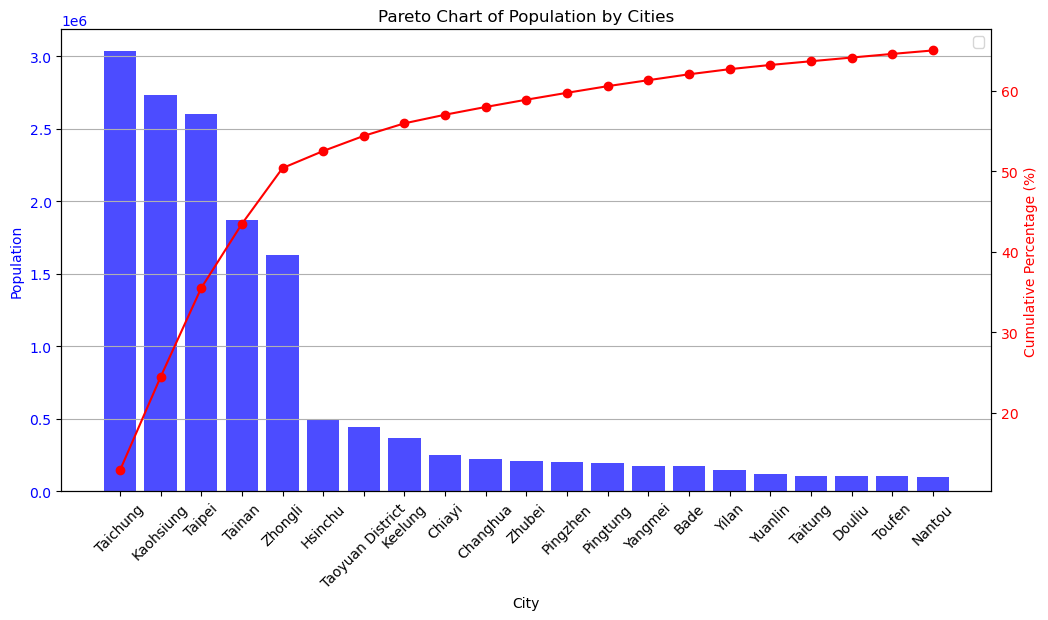

In [18]:
# Create a figure with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(df['city'][:21], df['population'][:21], color='b', alpha=0.7)
ax1.set_xlabel('City')
ax1.set_ylabel('Population', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(axis='y')

# Create the line for cumulative percentage on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['city'][:21], df['cum percentage'][:21] * 100, marker='o', color='r')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Pareto Chart of Population by Cities')
plt.show()

In [19]:
df.tail()

,city,lat,lng,population,percentage,cum percentage
154,Jianshi,24.7053,121.2014,9532,0.000404,0.834881
155,Xinpi,22.4880,120.5814,9528,0.000404,0.835285
156,Nanzhuang,24.5699,121.0157,9029,0.000383,0.835668
157,Beibu,24.6639,121.0681,8633,0.000366,0.836035
158,Nangan,26.1500,119.9333,7382,0.000313,0.836348


In [20]:
#https://plotly.com/python/scattermapbox/

fig = px.scatter_mapbox(df, lat="lat", lon="lng", 
                        color="percentage", size="percentage", hover_name='city', hover_data=['population'])
fig.update_layout(mapbox_style="open-street-map")
fig.show()